In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
#print(dataset_train)
training_set=dataset_train.iloc[:,1:2].values

In [7]:
#print(training_set)
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
#print(training_set_scaled)
X_train=[]
Y_train=[]
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  Y_train.append(training_set_scaled[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)
print(X_train)
print('*********************************************')
print(Y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
print('**********************************************')
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
*********************************************
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]
**********************************************
[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - loss: 0.0861
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - loss: 0.0064
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.0059
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - loss: 0.0055
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.0048
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0057
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0048
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0050
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.0042
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0047
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


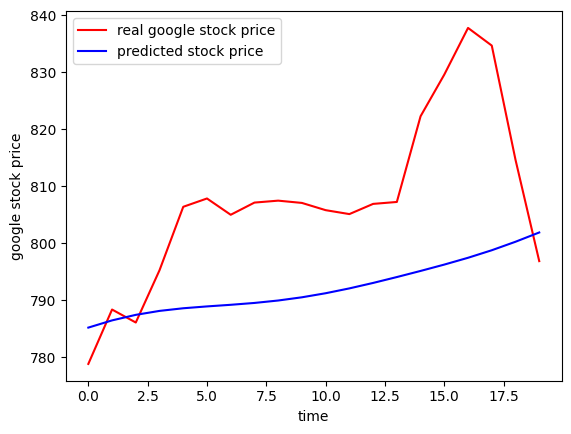

In [12]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,Y_train,epochs=10,batch_size=32)

dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price,color='red',label='real google stock price')
plt.plot(predicted_stock_price,color='blue',label='predicted stock price')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()
